## Riddler Express 12.7.18: Louie's Umbrellas 

From @FiveThirtyEight: https://fivethirtyeight.com/features/the-little-mathematically-determined-house-on-the-prairie/

Louie walks to and from work every day. In his city, there is a 50 percent chance of rain each morning and an independent 40 percent chance each evening. His habit is to bring (and use) an umbrella if it’s raining when he leaves the house or office, but to leave them all behind if not. Louie owns three umbrellas.

On Sunday night, two are with him at home and one is at his office. Assuming it never starts raining during his walk to his home or office, what is the probability that he makes it through the work week without getting wet?

* Solution | Cory Jez | @BballMaths | github.com/jezlax 

Louie's problem is both a probabilistic (will it rain?) and a deterministic (the rules for what we do if it is/is not raining are fixed) one where he finds himself in certain states. 

In order to sovle this problem, we can simulate the a given week, with the rules outlined above and letting Louie take his umbrella if it is raining, which we model with a continuous random variable chosen between 0 and 1, with > 0.5 meaning rain in the AM and > 0.6 meaning rain in the PM. 

From there, we can simulate as many weeks as we want to see how often Louie gets rained on. We can also use this method to see how many weeks it takes to converge to the true probability, which are discussed in the charts below. 

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import truncnorm
from matplotlib import pyplot as plt
from random import *
from __future__ import division

In [60]:
def run_week(home, work):
    #initial states 
    loc = 0 #starting at home
    hu = home #2 umbrellas at home 
    wu = work #1 umbrella at wor
    wet = 0 #will set to 1 if we get wet 
    
    for i in range(0,5):
    ## MORNING COMMUTE ##
        if random() >= 0.5:
        #does Louie have an umbrella?
            if hu > 0:
            # if he does: go to work, subtract a home umbrella, add a work umbrella
                hu-=1
                wu+=1
                loc+=1
            else:
                #if he doesn't, he gets wet and still goes to work
                wet+=1
                loc+=1
        else:
            #if its not raining, just go to work!
            loc+=1
        
        ## EVENING COMMUTE ##
        if random() >= 0.6:
        #does Louie have an umbrella?
            if wu > 0:
                # if he does: go home, subtract a work umbrella, add a home umbrella
                wu-=1
                hu+=1
                loc-=1
            else:
                #if i don't i get wet!
                wet+=1
                loc-=1
        else:
            #if its not raining, just go home!
            loc-=1
    
    return wet

In [61]:
wet_weeks = []
for i in range(0,50000):
    if run_week(2,1) > 0:
        wet_weeks.append(1)
    else:
        wet_weeks.append(0)

In [62]:
#graph it out
iters = []
for i in range(1,50001):
    iters.append(i)

tot = list(np.cumsum(wet_weeks))
pct_wet = [t / i for t,i in zip(tot, iters)]

### SOLUTIONS
Now we've run 50k weeks (yes, Louie is immortal yet cannot seem to save enough for retirement), and we can look at two things:
1) How often does Louie get wet (the original question)
2) How many weeks does it take to know the true probability of Louie getting wet 
3) How many umbrellas does Louie need (at a minimum at each location to guarantee that he never gets wet)? 

#### 1: What are the odds that Louie gets wet? 
After 50,000 weeks, Louie gets wet 30.79% of the time! Not that bad!

In [63]:
pct_wet[-1]

0.30798

#### 2: How many weeks does it take to converge to this value?

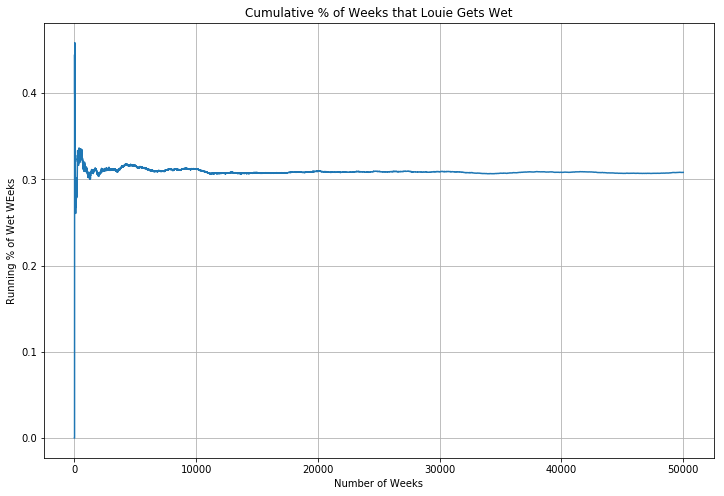

In [64]:
# Data for plotting
y = pct_wet
x = range(1,50001)

fig, ax = plt.subplots()
ax.plot(x,y)

ax.set(xlabel='Number of Weeks', ylabel='Running % of Wet WEeks',
       title='Cumulative % of Weeks that Louie Gets Wet')
ax.grid()
fig.savefig("test.png")
fig.set_figwidth(12)
fig.set_figheight(8)
plt.show()

We can still see a bit of instability in Louie's wet rate through the first 1000 weeks or so, infact we see the following wet rates at each increment. 

In [67]:
print "Louie gets wet " + str(round(pct_wet[100],4)*100) + "% of the time after 100 weeks"
print "Louie gets wet " + str(round(pct_wet[250],4)*100) + "% of the time after 250 weeks"
print "Louie gets wet " + str(round(pct_wet[500],4)*100) + "% of the time after 500 weeks"
print "Louie gets wet " + str(round(pct_wet[1000],4)*100) + "% of the time after 1000 weeks"
print "Louie gets wet " + str(round(pct_wet[2500],4)*100) + "% of the time after 2500 weeks"
print "Louie gets wet " + str(round(pct_wet[5000],4)*100) + "% of the time after 5000 weeks"
print "Louie gets wet " + str(round(pct_wet[10000],4)*100) + "% of the time after 10000 weeks"
print "Louie gets wet " + str(round(pct_wet[20000],4)*100) + "% of the time after 20000 weeks"

Louie gets wet 28.71% of the time after 100 weeks
Louie gets wet 32.27% of the time after 250 weeks
Louie gets wet 33.13% of the time after 500 weeks
Louie gets wet 31.27% of the time after 1000 weeks
Louie gets wet 31.07% of the time after 2500 weeks
Louie gets wet 31.53% of the time after 5000 weeks
Louie gets wet 31.18% of the time after 10000 weeks
Louie gets wet 30.93% of the time after 20000 weeks


So here we can see that it takes up to 20000 weeks (384 years!) for Louie to figure out that his true probaility of getting wet is 30%!

#### 3: How many umbrellas does Louie need to ensure he never gets wet?
We can take the same function above, but iterate over values for home and work umbrellas to see what combinations give us scenarios where Louie never gets wet over the 50,000 weeks (960 years) of commuting to work.

In [68]:
h_umb = range(1,6)
w_umb = range(1,6)

In [69]:
for h in h_umb:
    for w in w_umb:
        wet_weeks2 = []
        for i in range(0,50000):
            if run_week(h,w) > 0:
                wet_weeks2.append(1)
            else:
                wet_weeks2.append(0)

        print "With " +str(h) +" umbrellas at home and " +str(w) + " umbrellas at work, Louie gets wet " + str(sum(wet_weeks2)) + " weeks out of 50,000"

With 1 umbrellas at home and 1 umbrellas at work, Louie gets wet 28761 weeks out of 50,000
With 1 umbrellas at home and 2 umbrellas at work, Louie gets wet 23356 weeks out of 50,000
With 1 umbrellas at home and 3 umbrellas at work, Louie gets wet 21855 weeks out of 50,000
With 1 umbrellas at home and 4 umbrellas at work, Louie gets wet 21474 weeks out of 50,000
With 1 umbrellas at home and 5 umbrellas at work, Louie gets wet 21857 weeks out of 50,000
With 2 umbrellas at home and 1 umbrellas at work, Louie gets wet 15288 weeks out of 50,000
With 2 umbrellas at home and 2 umbrellas at work, Louie gets wet 9854 weeks out of 50,000
With 2 umbrellas at home and 3 umbrellas at work, Louie gets wet 8441 weeks out of 50,000
With 2 umbrellas at home and 4 umbrellas at work, Louie gets wet 8188 weeks out of 50,000
With 2 umbrellas at home and 5 umbrellas at work, Louie gets wet 8207 weeks out of 50,000
With 3 umbrellas at home and 1 umbrellas at work, Louie gets wet 9091 weeks out of 50,000
With

So - we can see here, that the ONLY way for Louie to guarantee that he NEVER gets wet for a given week is to keep 5 umbrellas at home and 5 umbrellas at his office! Having 5 at home and 4 at work still gets Louie wet 18 weeks out of 50,000!